# 显卡/比特币对冲指南

显卡溢价严重，通过购买显卡同时做空比特币，使得比特币与显卡价格下跌时，做空比特币的收益弥补显卡的贬值。

从整体过程来看相当于不必等待价格下跌，立即以降价后的价格购买显卡。

In [540]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn-darkgrid')

## 1. 数字货币交易数据处理

数据来源：BINANCE(币安)

合约种类：BTCUSDT,DOGEUSDT,ETHUSDT,LTCUSDT

In [541]:
df_BTCUSDT = pd.read_csv("./data/Binance_BTCUSDT_d.csv", header=1, parse_dates=['date'], infer_datetime_format=True, index_col='date')
df_DOGEUSDT = pd.read_csv("./data/Binance_DOGEUSDT_d.csv", header=1, parse_dates=['date'], infer_datetime_format=True, index_col='date')
df_ETHUSDT = pd.read_csv("./data/Binance_ETHUSDT_d.csv", header=1, parse_dates=['date'], infer_datetime_format=True, index_col='date')
df_LTCUSDT = pd.read_csv("./data/Binance_LTCUSDT_d.csv", header=1, parse_dates=['date'], infer_datetime_format=True, index_col='date')

df_BTCUSDT.head(3)

,unix,symbol,open,high,low,close,Volume BTC,Volume USDT,tradecount
date,,,,,,,,,
2022-03-23,1647993600000,BTC/USDT,42349.9,42476.4,42295.3,42381.6,4008.505,1.698985e+08,39690
2022-03-22,1647907200000,BTC/USDT,40982.0,43517.7,40852.0,42349.8,374297.674,1.589269e+10,3429191
2022-03-21,1647820800000,BTC/USDT,41261.0,41544.4,40430.0,40982.0,308396.460,1.265366e+10,2575120


In [545]:
df_XUSDT = [df_BTCUSDT, df_DOGEUSDT, df_ETHUSDT, df_LTCUSDT]

df_XUSDT_ALL = pd.concat([(df['high']+df['low'])/2 for df in df_XUSDT], axis=1)
df_XUSDT_ALL.columns = ['BTCUSDT', 'DOGEUSDT', 'ETHUSDT', 'LTCUSDT']

df_XUSDT_ALL.head(3)

,BTCUSDT,DOGEUSDT,ETHUSDT,LTCUSDT
date,,,,
2019-09-08,10206.325,NaN,NaN,NaN
2019-09-09,10276.380,NaN,NaN,NaN
2019-09-10,10161.920,NaN,NaN,NaN


## 2. 四个币种相关性分析

* 将4个币种Z-score标准化(由于4个币种的价格相差较大)，绘制走势曲线，直观分析走势
* 计算相关系数矩阵，定量分析币种走势相关性

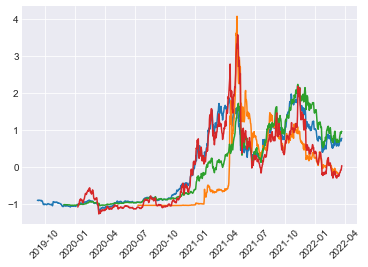

In [527]:
df_XUSDT_NORM = df_XUSDT_ALL.apply(lambda x: (x-x.mean())/x.std(), axis=0)

plt.plot(df_XUSDT_NORM.index, df_XUSDT_NORM)
plt.xticks(rotation=45)
plt.rcParams['figure.figsize'] = (12.0, 8.0)
plt.show()

In [528]:
df_XUSDT_NORM.corr()

,BTCUSDT,DOGEUSDT,ETHUSDT,LTCUSDT
BTCUSDT,1.000000,0.634585,0.908280,0.918530
DOGEUSDT,0.634585,1.000000,0.780435,0.733545
ETHUSDT,0.908280,0.780435,1.000000,0.797817
LTCUSDT,0.918530,0.733545,0.797817,1.000000


**结论：**

1. 从走势图可以看出4个币种走势相似
2. 从相关矩阵可以看出4个币种相关性很高，其中ETH\LTC与BTC的相关性在0.9左右

## 3. 显卡价格数据处理

In [550]:
df_RTX2080 = pd.read_csv("./data/GTX1070.csv", parse_dates=['date'], infer_datetime_format=True, index_col='date')
df_GTX1650 = pd.read_csv("./data/GTX1650.csv", parse_dates=['date'], infer_datetime_format=True, index_col='date')
df_RTX2080 = pd.read_csv("./data/RTX2080.csv", parse_dates=['date'], infer_datetime_format=True, index_col='date')
df_RTX3060 = pd.read_csv("./data/RTX3060.csv", parse_dates=['date'], infer_datetime_format=True, index_col='date')
df_RTX3060ti = pd.read_csv("./data/RTX3060ti.csv", parse_dates=['date'], infer_datetime_format=True, index_col='date')
df_RTX3070 = pd.read_csv("./data/RTX3070.csv", parse_dates=['date'], infer_datetime_format=True, index_col='date')

In [557]:
# 将显卡售价数据合并进一个表里
dfGPU_list = [df_GTX1070, df_GTX1650, df_RTX2080, df_RTX3060, df_RTX3060ti, df_RTX3070]

df_GPU_ALL = pd.concat([df[~df.index.duplicated(keep='first')] for df in dfGPU_list], axis=1)

df_GPU_ALL.columns = ['RTX2080_new', 'GTX1070_2nd', 'df_GTX1650_new', 'df_GTX1650_2nd', 'RTX2080_new', 'RTX2080_2nd', 
                        'RTX3060_new', 'RTX3060_2nd', 'RTX3060ti_new', 'RTX3060ti_2nd', 'RTX3070_new', 'RTX3070_2nd']

df_GPU_ALL.head(3)

,GTX1070_new,GTX1070_2nd,df_GTX1650_new,df_GTX1650_2nd,RTX2080_new,RTX2080_2nd,RTX3060_new,RTX3060_2nd,RTX3060ti_new,RTX3060ti_2nd,RTX3070_new,RTX3070_2nd
date,,,,,,,,,,,,
2016-06-18,599.98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-06-22,599.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-06-26,519.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


* 将各显卡价格标准化
* 绘制走势曲线，直观分析走势

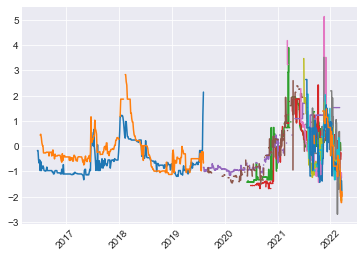

In [558]:
df_GPU_NORM = df_GPU_ALL.apply(lambda x: (x-x.mean())/x.std(), axis=0)

plt.plot(df_GPU_NORM.index, df_GPU_NORM)
plt.xticks(rotation=45)
plt.rcParams['figure.figsize'] = (15.0, 8.0)
plt.show()

## 4. 显卡价格与数字货币价格分析



In [559]:
# 显卡与数字货币价格合并
df_all = pd.concat([df_XUSDT_NORM[['BTCUSDT']], df_GPU_NORM], axis=1, join='outer')

# 数据插补，方便画图
df_all = df_all.interpolate()

df_all.head(3)

,BTCUSDT,GTX1070_new,GTX1070_2nd,df_GTX1650_new,df_GTX1650_2nd,RTX2080_new,RTX2080_2nd,RTX3060_new,RTX3060_2nd,RTX3060ti_new,RTX3060ti_2nd,RTX3070_new,RTX3070_2nd
2016-06-18,NaN,-0.172968,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-06-22,NaN,-0.172922,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-06-26,NaN,-0.548558,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

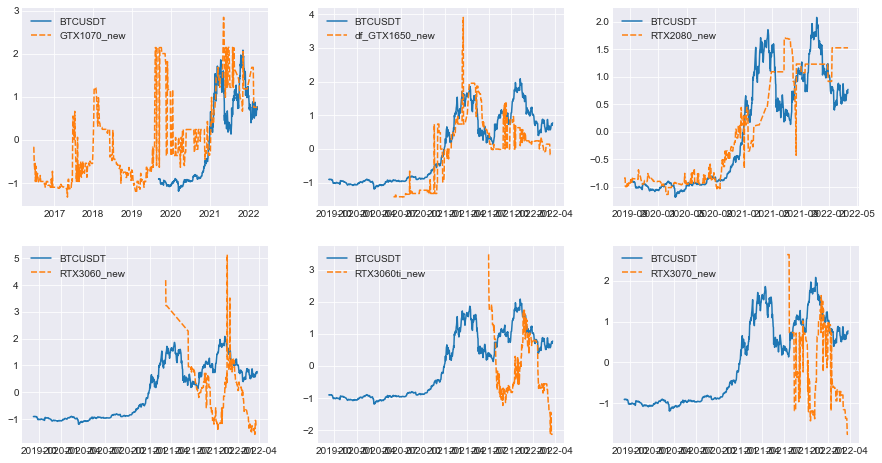

In [560]:
fig, ax = plt.subplots(2, 3)

sns.lineplot(data=df_all[['BTCUSDT', 'GTX1070_new']], ax=ax[0][0])
sns.lineplot(data=df_all[['BTCUSDT', 'df_GTX1650_new']], ax=ax[0][1])
sns.lineplot(data=df_all[['BTCUSDT', 'RTX2080_new']], ax=ax[0][2])
sns.lineplot(data=df_all[['BTCUSDT', 'RTX3060_new']], ax=ax[1][0])
sns.lineplot(data=df_all[['BTCUSDT', 'RTX3060ti_new']], ax=ax[1][1])
sns.lineplot(data=df_all[['BTCUSDT', 'RTX3070_new']], ax=ax[1][2])


<AxesSubplot:>

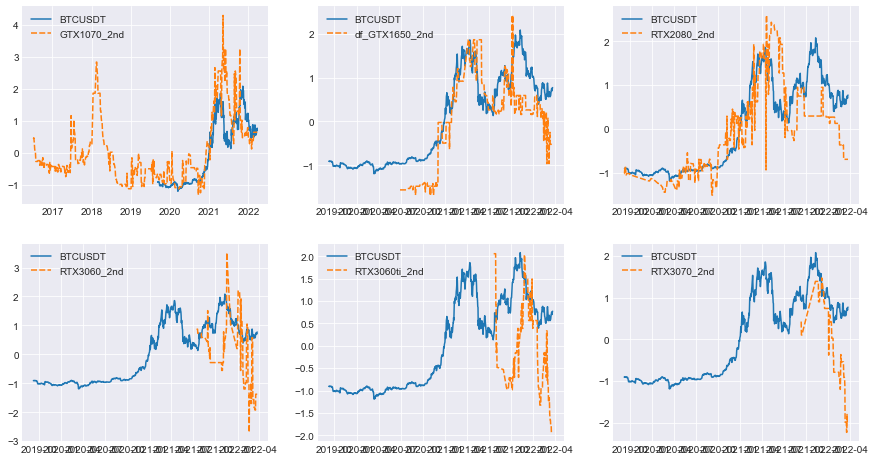

In [561]:
fig, ax = plt.subplots(2, 3)

sns.lineplot(data=df_all[['BTCUSDT', 'GTX1070_2nd']], ax=ax[0][0])
sns.lineplot(data=df_all[['BTCUSDT', 'df_GTX1650_2nd']], ax=ax[0][1])
sns.lineplot(data=df_all[['BTCUSDT', 'RTX2080_2nd']], ax=ax[0][2])
sns.lineplot(data=df_all[['BTCUSDT', 'RTX3060_2nd']], ax=ax[1][0])
sns.lineplot(data=df_all[['BTCUSDT', 'RTX3060ti_2nd']], ax=ax[1][1])
sns.lineplot(data=df_all[['BTCUSDT', 'RTX3070_2nd']], ax=ax[1][2])

## 5. 比例计算

In [562]:
import plotly.graph_objs as go

In [563]:
fig = go.Figure()

# Add traces
fig.add_trace(go.Scatter(x=df_all.index, y=df_all['BTCUSDT'], mode='lines', name='BTCUSDT'))

for GPU in df_GPU_all.columns:
    fig.add_trace(go.Scatter(x=df_all.index, y=df_all[GPU], mode='lines', name=GPU))

fig.show()

计算数字货币4次行情期间，2080/3060ti的涨跌幅
* 2020_8到2021_5牛市
* 2021_5到2021_7熊市
* 2021_7到2021_11熊市
* 2021_11到2022_1熊市

In [594]:
BTCUSDT_2020_8 = df_XUSDT_ALL.loc['2020-8-3', 'BTCUSDT']
BTCUSDT_2021_5 = df_XUSDT_ALL.loc['2021-5-8', 'BTCUSDT']
BTCUSDT_2021_7 = df_XUSDT_ALL.loc['2021-7-20', 'BTCUSDT']
BTCUSDT_2021_11 = df_XUSDT_ALL.loc['2021-11-9', 'BTCUSDT']
BTCUSDT_2022_1 = df_XUSDT_ALL.loc['2022-1-24', 'BTCUSDT']

BTCUSDT_stage_1 = (BTCUSDT_2021_5 - BTCUSDT_2020_8) / BTCUSDT_2020_8
BTCUSDT_stage_2 = (BTCUSDT_2021_7 - BTCUSDT_2021_5) / BTCUSDT_2021_5
BTCUSDT_stage_3 = (BTCUSDT_2021_11 - BTCUSDT_2021_7) / BTCUSDT_2021_7
BTCUSDT_stage_4 = (BTCUSDT_2022_1 - BTCUSDT_2021_11) / BTCUSDT_2021_11

print(BTCUSDT_stage_1, BTCUSDT_stage_2, BTCUSDT_stage_3, BTCUSDT_stage_4)

4.2018303133089345 -0.48270187240550816 1.2386821255936087 -0.47855716562958694


In [627]:
RTX2080_2020_11 = df_GPU_ALL.loc['2020-8-10', 'RTX2080_2nd']
RTX2080_2021_4 = df_GPU_ALL.loc['2021-4-20', 'RTX2080_2nd']
RTX2080_2021_8 = df_GPU_ALL.loc['2021-8-11', 'RTX2080_2nd']
RTX2080_2021_12 = df_GPU_ALL.loc['2021-12-3', 'RTX2080_2nd']
RTX2080_2022_3 = df_GPU_ALL.loc['2022-3-5', 'RTX2080_2nd']

RTX2080_stage_1 = (RTX2080_2021_4 - RTX2080_2020_11) / RTX2080_2020_11
RTX2080_stage_2 = (RTX2080_2021_8 - RTX2080_2021_4) / RTX2080_2021_4
RTX2080_stage_3 = (RTX2080_2021_12 - RTX2080_2021_8) / RTX2080_2021_8
RTX2080_stage_4 = (RTX2080_2022_3 - RTX2080_2021_12) / RTX2080_2021_12

print(RTX2080_stage_1, RTX2080_stage_2, RTX2080_stage_3, RTX2080_stage_4)

1.20932801544204 -0.45842105263157895 0.35998056365403314 -0.3575910019865373


In [628]:
RTX3060ti_2021_7 = df_GPU_ALL.loc['2021-7-1','RTX3060ti_new']
RTX3060ti_2021_8 = df_GPU_ALL.loc['2021-8-29','RTX3060ti_new']
RTX3060ti_2021_11 = df_GPU_ALL.loc['2021-11-21','RTX3060ti_new']
RTX3060ti_2022_3 = df_GPU_ALL.loc['2022-3-20','RTX3060ti_new']

RTX3060ti_stage_2 = (RTX3060ti_2021_8 - RTX3060ti_2021_7) / RTX3060ti_2021_7
RTX3060ti_stage_3 = (RTX3060ti_2021_11 - RTX3060ti_2021_8) / RTX3060ti_2021_8
RTX3060ti_stage_4 = (RTX3060ti_2022_3 - RTX3060ti_2021_11) / RTX3060ti_2021_11

print(RTX3060ti_stage_2, RTX3060ti_stage_3, RTX3060ti_stage_4)

-0.4042630560928433 0.42858998168807383 -0.39091818181818183


In [630]:
print('1阶段：BTCUSDT涨了{:.1f}%，RTX2080涨了{:.1f}%'.format(BTCUSDT_stage_1*100, RTX2080_stage_1*100))
print('2阶段：BTCUSDT跌了{:.1f}%，RTX2080跌了{:.1f}%，RTX3060ti跌了{:.1f}%'.format(BTCUSDT_stage_2*100, RTX2080_stage_2*100, RTX3060ti_stage_2*100))
print('3阶段：BTCUSDT涨了{:.1f}%，RTX2080涨了{:.1f}%，RTX3060ti涨了{:.1f}%'.format(BTCUSDT_stage_3*100, RTX2080_stage_3*100, RTX3060ti_stage_3*100))
print('4阶段：BTCUSDT跌了{:.1f}%，RTX2080跌了{:.1f}%，RTX3060ti跌了{:.1f}%'.format(BTCUSDT_stage_4*100, RTX2080_stage_4*100, RTX3060ti_stage_4*100))

1阶段：BTCUSDT涨了420.2%，RTX2080涨了120.9%
2阶段：BTCUSDT跌了-48.3%，RTX2080跌了-45.8%，RTX3060ti跌了-40.4%
3阶段：BTCUSDT涨了123.9%，RTX2080涨了36.0%，RTX3060ti涨了42.9%
4阶段：BTCUSDT跌了-47.9%，RTX2080跌了-35.8%，RTX3060ti跌了-39.1%


In [632]:
(BTCUSDT_stage_2/RTX2080_stage_2 + BTCUSDT_stage_2/RTX3060ti_stage_2 +\
 BTCUSDT_stage_4/RTX2080_stage_4 + BTCUSDT_stage_4/RTX3060ti_stage_4)/4

1.2023659155312647

**BTCUSDT跌幅/显卡跌幅 ≈ 1.2**

若使： 显卡损失 = BTCUSDT盈利

则使： 显卡跌幅 * 显卡原价 = BTCUSDT跌幅 * 空单总值

故： 空单总值 = 显卡原价 * 0.83

若空单带有n倍杠杆，则空单总值再除以n，即： 空单总值 = (显卡原价 * 0.83) / n

# 6. 风险分析

希望是美好的，但收益与风险并存：显卡/比特币规律失效；流动性风险；数字货币交易本身的不确定性等等

其中，显卡/比特币规律失效发生概率较高且危害较大，因为整个逻辑建立再该规律的基础上。

购买显卡做空比特币后，显卡/比特币走势有四种可能：

* 显卡降价，比特币下跌

这是符合规律的情况，且走势符合预期，比特币的收益可以弥补显卡的降价，使你相当于以低价购入显卡。

* 显卡降价，比特币上涨

这是不符合规律的情况，同时是最糟的情况，不过仍有可能遇到，因为显卡的价格不仅由比特币支撑，更依赖于供需关系等。或者由于显卡价格相对于比特币滞后的特性也会导致这个情况。这种情况会导致不仅显卡“买贵了”，还额外亏损一笔做空比特币的资金。不过可以得到安慰的一点是，既然比特币价格上涨可以通过挖矿减小损失，等待到显卡涨价或者比特币下跌。

* 显卡涨价，比特币下跌

这是不符合规律的情况，但也许是最好的情况，不仅在低位买入了显卡，同时额外赚取一笔做空比特币的收益。

* 显卡涨价，比特币涨价

这是符合规律的情况，走势和我们预计的相反。但这种情况并不会亏损，比特币涨价使我们亏损了做空比特币的资金，但显卡涨价可以卖出显卡弥补这部分亏损。虽然没有亏损，但届时我们将面临无卡可用且卡价上涨的情况，解决思路有两个，一是由于规律没有失效可以再次购买显卡同时做空比特币；第二个是靠挖矿抵消比特币涨价的亏损。

**总结**

只要显卡/比特币规律不失效，就是稳赚不赔，规律失效的情况可能赚可能亏，亏损的情况只能靠挖矿减小损失了。